# Problem 1

## a

In [87]:
import pandas as pd
import scipy.sparse as sp
import numpy as np

def solve_linear_poisson(N):
    # N = 100
    xx = np.linspace(0,2*np.pi,N)
    dx = xx[1]-xx[0]
    dy = xx[1]-xx[0]
    data = list()
    row_ind = list()
    col_ind = list()
    x_list = list()
    y_list = list()
    # i mod 100 for i, j // 100 for j
    u = lambda x,y : np.sin(2*y)*np.cos(2*x)
    f = np.zeros(N*N)
    for n in range(N*N):
        i = n % N
        j = n // N
        f[n] = -8*np.sin(2*xx[j]) * np.cos(2*xx[i])
        x_list.append(i*dx)
        y_list.append(j*dy)
        if i == 0 or i == (N-1)  or j == 0 or j == N-1:
            data.append(1)
            row_ind.append(n)
            col_ind.append(n)
            f[n] = np.sin(2*xx[j]) * np.cos(2*xx[i])

        else:
            for ii,jj,kk in zip([1,-4,1,1,1], [n-1,n,n+1,n,n], [n-1,n,n+1,n-N,n+N]):
                data.append(ii/(dx**2))
                row_ind.append(n)
                col_ind.append(kk)

    sparse_matrix = sp.csr_matrix((data,(row_ind,col_ind)),shape=(N*N,N*N))

    u_n = sp.linalg.spsolve(sparse_matrix,f)
    xx = np.linspace(0,np.pi*2,N)
    x_vals, y_vals = np.mgrid[0:2*np.pi:1j*N, 0:np.pi*2:1j*N]
    x_vals, y_vals = np.array(x_list).reshape(N,N), np.array(y_list).reshape(N,N)

    u_vals = np.array(u_n)
    # print(u_vals.size,x_vals.size)
    u_vals.resize(x_vals.shape)
    v_vals = u(x_vals, y_vals)
    return x_vals, y_vals, u_vals, v_vals
x,y,u,v = solve_linear_poisson(500)

In [88]:
import numpy as np
from scipy.io import savemat
import os
# Create some NumPy arrays
X1 = x
X2 = y
U =  u
V = v

# Dictionary to hold data
data = {
    'X1': X1,  # Save x array
    'X2': X2,  # Save y array
    'U': U,   # Save z array
    'V' : V
}

# Save the data to a MATLAB .mat file
savemat(os.getcwd()[0]+':\\andyh\\Documents\\Projects\\matlab_environments\\3d_graph.mat', data)  # 'data.mat' is the filename

In [89]:
p2_error = np.zeros(15)
pinf_error = np.zeros(15)
u = lambda x : np.sin(x)

nn = [int(2**(i/3)) + 1 for i in range(10,25)]
for i,n in enumerate(nn):
    xx = np.linspace(0,5,n)
    actual_u = u(xx)
    x,y,un,actual = solve_linear_poisson(n) 
    # f_x = compute_numerical_second_derivative(xx,fx)
    diff = un.flatten() - actual.flatten()
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(actual)))
    pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(actual_u))


slope p2 = -2.047508782976551, slope pinf = -2.045286078625659


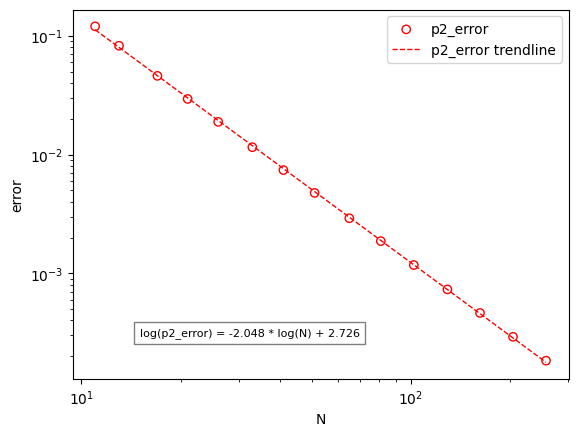

In [90]:

import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
# ax.scatter(nn, pinf_error, facecolor='none', edgecolors='blue',label="pinf_error",marker='^')

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
# tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
# pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
# ax.plot(nn, np.exp(pinf_trend), 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}, slope pinf = {tlpinf[0]}')

# equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
#                    "\n",
#                    f"log(pinf_error) = {round(tlpinf[0],3)} * log(N) + {round(tlpinf[1],3)}"])
equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}"])
plt.text(15, .0003, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()

# Problem 4

slope p2 = 3.439065165180919, slope pinf = 3.103911321216775


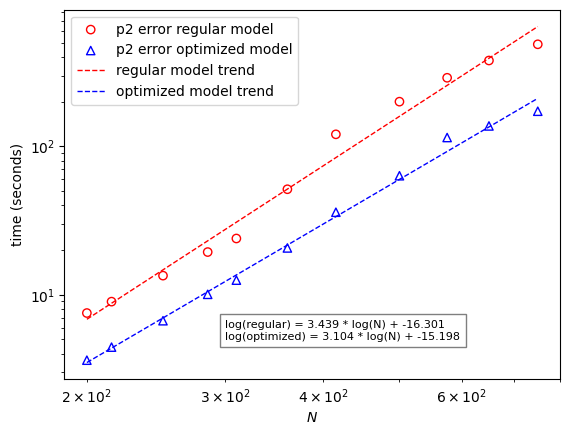

In [91]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig,ax = plt.subplots()
df = pd.read_csv('homework_1_problem_4_data.csv')
nn = df['N']
slow_model = df['Slow Time']
fast_model = df['Fast Time']
ax.scatter(nn, slow_model, facecolor='none', edgecolors='red', label="p2 error regular model")
ax.scatter(nn, fast_model, facecolor='none', edgecolors='blue',label="p2 error optimized model",marker='^')

tls = np.polyfit(np.log(nn), np.log(slow_model), 1)
tlf = np.polyfit(np.log(nn), np.log(fast_model), 1)

slow_trend = np.dot(np.array(tls).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
fast_trend = np.dot(np.array(tlf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(slow_trend), 'red', linewidth=1, linestyle = 'dashed',label="regular model trend")
ax.plot(nn, np.exp(fast_trend), 'blue', linewidth=1, linestyle = 'dashed',label="optimized model trend")

print(f'slope p2 = {tls[0]}, slope pinf = {tlf[0]}')

equation = "".join([f"log(regular) = {round(tls[0],3)} * log(N) + {round(tls[1],3)}",
                    "\n",
                    f"log(optimized) = {round(tlf[0],3)} * log(N) + {round(tlf[1],3)}"])

plt.text(300, 5, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N$')
ax.set_ylabel('time (seconds)')
ax.legend()

# Problem 2 error

slope p2 = -2.026726448276963 slope p2 = -2.0994209140437206


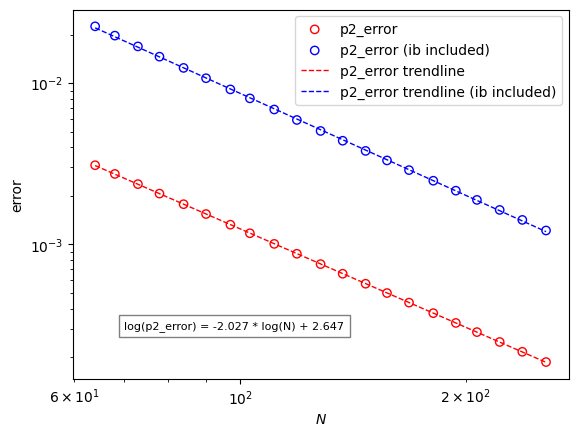

In [96]:

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
df = pd.read_csv('homework_1_problem_2_error.csv')
p2_error = df['error_dx']
p2_error_ib = df['error_combined']
nn = np.square(df['N'])
nn = df['N']
# nn=np.pi*2/nn
ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
ax.scatter(nn, p2_error_ib, facecolor='none', edgecolors='blue', label="p2_error (ib included)")

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlp2ib = np.polyfit(np.log(nn), np.log(p2_error_ib), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
p2ib_trend = np.dot(np.array(tlp2ib).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
ax.plot(nn, np.exp(p2ib_trend), 'blue', linewidth=1, linestyle = 'dashed',label="p2_error trendline (ib included)")

print(f'slope p2 = {tlp2[0]} slope p2 = {tlp2ib[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}"])

plt.text(70, .0003, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N$')
ax.set_ylabel('error')
ax.legend()

slope p2 = 0.00717421392188659 slope p2 = -2.0994209140437206


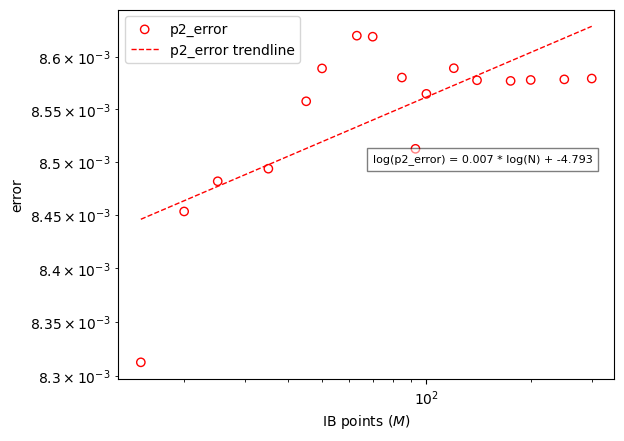

In [111]:

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
df = pd.read_csv('homework_1_problem_2_error.csv')
p2_error = df['error_dx']
p2_error_ib = df['error_combined']
nn = np.square(df['N'])
nn = df['N']
# nn=np.pi*2/nn
ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
# ax.scatter(nn, p2_error_ib, facecolor='none', edgecolors='blue', label="p2_error (ib included)")

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
# tlp2ib = np.polyfit(np.log(nn), np.log(p2_error_ib), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
# p2ib_trend = np.dot(np.array(tlp2ib).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
# ax.plot(nn, np.exp(p2ib_trend), 'blue', linewidth=1, linestyle = 'dashed',label="p2_error trendline (ib included)")

print(f'slope p2 = {tlp2[0]} slope p2 = {tlp2ib[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}"])

plt.text(70, .0085, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'IB points $(M)$')
ax.set_ylabel('error')
ax.legend()